In [3]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')

In [11]:
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# import joblib

# # Создание экземпляров препроцессоров
# scaler = StandardScaler()

# # Создание экземпляра модели
# linreg = LinearRegression()

# X = df[['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'sqft_above']].values  # Независимые переменные
# y = df['price'].values  # Зависимая переменная
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Создание пайплайна
# pipeline = Pipeline([
#     ('scaler', scaler),
#     ('linreg', linreg)
# ])

# # Обучение пайплайна
# pipeline.fit(X_train, y_train)

# # Сохранение пайплайна
# joblib.dump(pipeline, 'model_pipeline.joblib')

In [37]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

linreg = LinearRegression()
scaler = StandardScaler()
pca = PCA()

X = df[['sqft_living', 'grade', 'view', 'sqft_above', 'sqft_living15']].values  # Независимые переменные
y = df['price'].values  # Зависимая переменная

normalized_features = scaler.fit_transform(X)

pca_features = pca.fit_transform(normalized_features)

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

selected_components = pca_features[:, :6]

X_train, X_test, y_train, y_test = train_test_split(selected_components, y, test_size=0.2)

pipeline = Pipeline([
    ('scaler', scaler),
    ('linreg', linreg)
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'model_pipeline.joblib')

train_score = pipeline.score(X_train, y_train)
print("Train score:", train_score)

[0.68023257 0.18260497 0.05883994 0.05536223 0.0229603 ]
Train score: 0.5712302549393625


In [7]:
new_data = [[2000, 7, 3, 2.00, 1150]]
predicted_price = pipeline.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 513426.1268350093


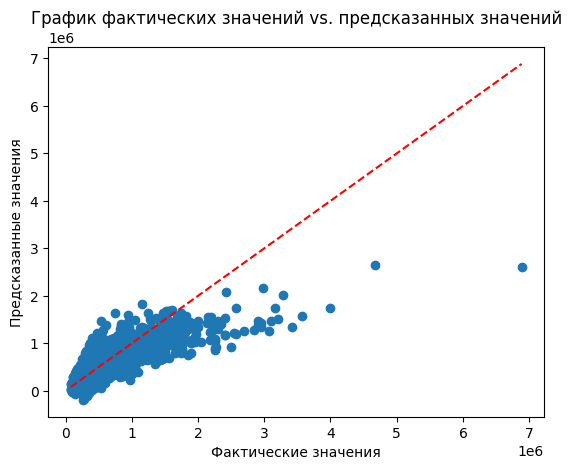

In [39]:
import matplotlib.pyplot as plt

y_pred = pipeline.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("График фактических значений vs. предсказанных значений")

x_line = [min(y_test), max(y_test)]
y_line = [min(y_test), max(y_test)]

plt.plot(x_line, y_line, color='r', linestyle='--')

plt.show()